# Mean-field:  The Hartree-Fock (HF) Approximation
## Square Latice Hubbard model

This notebook contains breif notes and several sample codes of the HF approximation for pedagogical purpose. The following codes are mainly written by Mr. [Ting-Tung Wang](https://quantummc.xyz/members/ting-tung-wang/) and Mr.[Menghan Song](https://quantummc.xyz/members/menghan-song/).

This note utilise the following useful references:
1. [Lechermann, Model Hamiltonians and Basic Techniques](https://www.researchgate.net/publication/299842893_Model_Hamiltonians_and_Basic_Techniques)
2. [Xu, Chang, Walter and Zhang, J. Phys.: Condens. Matter 23 (2011) 505601](https://iopscience.iop.org/article/10.1088/0953-8984/23/50/505601)
3. [Matsuyama and Greensite, Annals of Physics 442 (2022) 168922](https://www.sciencedirect.com/science/article/pii/S0003491622001014?via%3Dihub)
4. [Hirsch, Phys. Rev. B 31, 4403 (1985)](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403)

### 1. Hubbard Lattice

Considering the half-filling case, the Hamiltonian of the square lattice hubbard model is,

$$
H=-t\mathop{\sum}\limits_{\langle i,j \rangle \sigma}c_{i\sigma}^\dagger c_{j\sigma}+h.c.+U\mathop{\sum}\limits_i (n_{i\uparrow}-\frac{1}{2})(n_{i\downarrow}-\frac{1}{2})=H_T+H_U  \ \ \  (U>0),
$$
where $\langle i,j \rangle$ denotes the nearest neighbour hopping on the square lattice. 

### 2. Hartree-Fock

The mean-field (MF) treatment of a many body Hamiltonian is to approximate the ground state wavefunction with a product of single-particle wave functions. In such an approximation, individual particle is moving in the $\mathit{mean-field}$ generated by their mutual interactions. Applying this idea in to the Hubbard model, we decouple on the many-body Hamiltonian at the operator level to write the density operator as:

$$
n_{i\sigma} = ⟨n_{i\sigma}⟩ + \delta {n_{i\sigma}},
$$

which means that there is a bulk part of $\langle n_{i\sigma}\rangle$ as a mean-field, and a smaller part $\delta n_{i\sigma}$ that carries the quantum fluctuations around the mean-field. With this decomposition, we can write the $H_U$ part as:

$$
n_{i\uparrow}n_{i\downarrow}=\left \langle n_{i\uparrow} \right \rangle \left \langle  n_{i\downarrow}\right \rangle+ \left \langle n_{i\uparrow} \right \rangle\delta n_{i\downarrow}+\left \langle n_{i\downarrow} \right \rangle \delta n_{i\uparrow}+\delta n_{i\uparrow}\delta n_{i\downarrow} 
$$

Now we peform the approximation and neglect the correlation of fluctuations $\delta n_{i\uparrow}\delta n_{i\downarrow} $, which is at the heart of MF theory on the microscopic level. By eliminating $\delta n_{i\uparrow}\delta n_{i\downarrow}$ term, the Hubbard term hence reads:

$$
U\sum_{i}^{} n_{i\uparrow}n_{i\downarrow}=U\sum_{i}^{}(n_{i\uparrow} \left \langle  n_{i\downarrow}\right \rangle+n_{i\downarrow} \left \langle  n_{i\uparrow}\right \rangle-\left \langle n_{i\uparrow} \right \rangle \left \langle  n_{i\downarrow}\right \rangle).
$$

Since the square lattice Hubbard model is symmetric with respect to spins, we seperate the $\mathcal{H}_{HF}$ into spin $\uparrow$ and $\downarrow$ parts, $\mathcal{H}_{HF}=\mathcal{H}_{HF}^{\uparrow}+\mathcal{H}_{HF}^{\downarrow}$ with,

$$
\mathcal{H}_{HF}^{\sigma} = -t\sum(c^{\dagger}_{\sigma}c_{\sigma}+c_{\sigma}c_{\sigma}^{\dagger})+U\sum n_{\sigma}\left \langle n_{\bar{\sigma} }\right \rangle -\frac{1}{2}U\sum \left \langle n_{\uparrow} \right \rangle \left \langle n_{\downarrow} \right \rangle,
$$

where I omit the site label in the summation, and $\bar{\sigma}$ means the opposite spin.

### 3. Self-consistent algorithm

There are many ways to solve the MF Hamiltonian, here we first show the simplest self-consistent algorithm. 

1. Randomly genrate two mean-fields of the particle number operator, $\left \langle n_{\uparrow} \right \rangle$ and $\left \langle n_{\downarrow} \right \rangle$.

2. Construct each $\mathcal{H}_{HF}^{\sigma}$ and thus $\mathcal{H}_{HF}$ from the $\left \langle n_{\uparrow} \right \rangle$ and $\left \langle n_{\downarrow} \right \rangle$ at hand.

3. Diagonalize the $\mathcal{H}_{HF}^{\sigma}$ and we can get the energy, $E_{\sigma}=\sum_{i=1}^{N_{\sigma}}\lambda_{\sigma i}$, where $\lambda_{\sigma 1}<\lambda_{\sigma 2}<...<\lambda_{\sigma N_{\sigma}}$ are the eigenvalues of the MF Hamiltonian matrix and $N_{\sigma}$ is the number of electrons with spin $\sigma$.

4. Denote the eigenvector of $\mathcal{H}_{HF}^{\sigma}$ as $\Phi_{\sigma 1},\Phi_{\sigma 2}...\Phi_{\sigma N} $ corresponding to the eigenvalue $\lambda_{\sigma 1}<\lambda_{\sigma 2}<...<\lambda_{\sigma N_{\sigma}}$. Then a new pair of $\left \langle n_{\sigma} \right \rangle$ are obtained as,

$$
\left \langle n_{i \sigma}\right \rangle = \sum_{j=1}^{N_\sigma} \Phi_{(\sigma j),i}\Phi_{(\sigma j),i}^\dagger .
$$

5. Construct the new $\mathcal{H}_{HF}^{\sigma}$ from the new mean-field  $\langle n_{i \sigma} \rangle $ obtained in step 4 and iterate this process untill converges.

### 4. Gradient-descent algorithm

We developed a machine-learning style gradient-descent algorithm to obtain the covergence of the MF Hamiltonian, in momentum space. It turns out in many cases, such as the square, honeycomb and triangular lattice Hubbard models, this Gradient-descent algorithm is much faster than the traditional Self-consistent algorithm and can access much larger system sizes.

<font color='red'>Ting Tung and Menghan, please fill in here.</font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 

In [2]:
def cart_coord(i,Lx): # i is the site index starts from 1.
    ix = i % Lx     
    iy = i//Lx + 1
    if i % Lx == 0: 
        iy -= 1
        ix = Lx
    return ix,iy

def linear_index(ix,iy,Lx):  #output linear index starts from 1.
    return int((iy-1)*Lx+ix)


def Neighbor(index,Lx,Ly):
    ix,iy=cart_coord(index,Lx)
    up_y = iy - 1
    if up_y <1:
        up_y=Ly
    up = linear_index(ix,up_y,Lx)
    
    down_y = iy+1
    if down_y > Ly:
        down_y = 1
    down=linear_index(ix,down_y,Lx)
    
    left_x=ix-1
    if left_x < 1:
        left_x = Lx
    left = linear_index(left_x,iy,Lx)
    
    right_x = ix+1
    if right_x > Lx:
        right_x = 1
    right = linear_index(right_x,iy,Lx)
    return up,down,left,right

def GetK(Lx,Ly,t):
    MatDim = Lx*Ly
    N_pc = Lx*Ly
    K_mat = np.zeros((MatDim,MatDim))
    for i in range(N_pc):
        down = Neighbor(i+1,Lx,Ly)[1]-1
        right = Neighbor(i+1,Lx,Ly)[3]-1
        K_mat[i][down]-=t
        K_mat[down][i]-=t
        K_mat[i][right]-=t
        K_mat[right][i]-=t
    return K_mat


In [3]:
def GetHup(Lx,Ly,nup,ndn,K,U):
    N = Lx*Ly
    Diag = np.diag(ndn)*U
    Hup = np.zeros((N,N))
    Hup += K
    Hup += Diag
    #Hup -= 1/2*U*sum(nup*ndn)
    return Hup

In [4]:
def GetHdn(Lx,Ly,nup,ndn,K,U):
    N = Lx*Ly
    Diag = np.diag(nup)*U
    Hdn = np.zeros((N,N))
    Hdn += K
    Hdn += Diag
    #Hdn -= 1/2*U*sum(nup*ndn)
    return Hdn

In [5]:
def GetEigen(H):
    eig_value=np.real(np.linalg.eig(H)[0])
    eig_vec=eig_vec=np.real(np.linalg.eig(H)[1]) 
    idx_sorted1 = np.argsort(eig_value)
    eig_value=eig_value[idx_sorted1]
    eig_vec=eig_vec[:,idx_sorted1]
    return eig_value,eig_vec

In [6]:
def Getnup(upvecs,N):
    '''At half-filling, we have N/2 number of spin up/down electrons'''
    nup = np.zeros((N))
    for i in range(N):
        value = 0
        for j in range(N//2):
            value += upvecs[i][j]**2
        nup[i] = value
    return nup

In [7]:
def Getndn(dnvecs,N):
    ndn = np.zeros((N))
    for i in range(N):
        value = 0
        for j in range(N//2):
            value += dnvecs[i][j]**2
        ndn[i] = value
    return ndn
        

In [8]:
def Iteration(Lx,Ly,U):
    
    N = Lx*Ly
    t = 1
    K = GetK(Lx,Ly,t)
    delt = 0.0001
    alpha = 0.6
    times=0
    
    #initial n
    nup = np.random.random((N))
    ndn = np.random.random((N))
    #nup = np.ones((N))/2+np.random.random((N))*0.2
    #ndn = np.ones((N))/2+np.random.random((N))*0.2
    
    E1=E2=0
    while True:
        Hup = GetHup(Lx,Ly,nup,ndn,K,U)
        Hdn = GetHdn(Lx,Ly,nup,ndn,K,U)
        eig_eup,eig_vup = GetEigen(Hup)
        eig_edn,eig_vdn = GetEigen(Hdn)
        
        Eup = sum(eig_eup[:(N//2)])
        Edn = sum(eig_edn[:(N//2)])
        E = Eup+Edn
        
        E1 = E2
        E2 = E
        
        nup0 = nup
        ndn0 = ndn
        
        nup1 = Getnup(eig_vup,N)
        ndn1 = Getndn(eig_vdn,N)
        
        nup_new = (1-alpha)*nup0+alpha*nup1
        ndn_new = (1-alpha)*ndn0+alpha*ndn1
        #nup_new = nup1
        #ndn_new = ndn1
        
        diffE = abs(E2-E1)
        diffup = abs(sum((nup_new-nup0)))
        diffdn = abs(sum((ndn_new-ndn0)))
        
        nup = nup_new
        ndn = ndn_new
        
        if diffup < delt**2 and diffdn < delt**2 and diffE<0.0001:
            #print('converge at:',times)
            #print('D_E:',diffE)
            #print('D_n:',diffup,diffdn)
            #print('E:',E)
            break
        
        times+=1
        #if times%10==0:
            #print(times)
    return nup,ndn,E

Here $\mathsf{nitr}$ is the number of times I call the $\mathsf{Iteration}$ function. I run the $\mathsf{Iteration}$ many times since it does not necessarily converge to the global minimun, i.e. ground state(it may get stuck at the local minimum). Thus, I run more times to find one trial which gives the smallest ground state energy and consider it as the global minimum.

In [9]:
def Run(Lx,Ly,U):
    N = Lx*Ly
    nitr = 80
    nups = np.zeros((nitr,N))
    ndns = np.zeros((nitr,N))
    Es = np.zeros((nitr))
    for i in range(nitr):
        
        nup,ndn,E = Iteration(Lx,Ly,U)
        nups[i]=nup
        ndns[i]=ndn
        Es[i]=E
        #print(E)
    idx = np.argmin(Es)
    nup_gs = nups[idx]
    ndn_gs = ndns[idx]
    E_gs = Es[idx]
    
    return nup_gs,ndn_gs,E_gs

In [10]:
nup_gs,ndn_gs,E_gs = Run(6,6,4)

From [Ref.[4]](https://journals.aps.org/prb/abstract/10.1103/PhysRevB.31.4403) above, we know that for the half-filled square lattice Hubbard model, the appropriate solution is an antiferromagnetic ordered phase with N\'eel order,

\begin{align} 
  \left \langle n_{i\uparrow} \right \rangle = n+(-1)^{i}m \\
 \left \langle n_{i\downarrow} \right \rangle = n-(-1)^{i}m .
\end{align}

The color maps below illustrate the charge density $\left \langle n_{i\uparrow} \right \rangle+\left \langle n_{i\downarrow} \right \rangle$ and spin density $\left \langle n_{i\uparrow} \right \rangle-\left \langle n_{i\downarrow} \right \rangle$ for a $L_x=L_y=6$ square lattice.

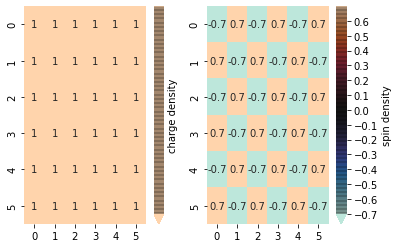

In [11]:
data1=(nup_gs+ndn_gs).reshape(6,6)
data1=pd.DataFrame(data1)
tick1_=np.arange(0,1,0.1).astype(float)
dict1_={'orientation':'vertical',"label":"charge density","drawedges":True,"ticklocation":"left","extend":"min", \
"filled":True,"alpha":0.8,"cmap":"cmap","ticks":tick1_}

data2=(nup_gs-ndn_gs).reshape(6,6)
data2=pd.DataFrame(data2)
tick2_=np.arange(-1,1,0.1).astype(float)
dict2_={'orientation':'vertical',"label":"spin density","drawedges":True,"ticklocation":"top","extend":"min", \
"filled":True,"alpha":0.8,"cmap":"cmap","ticks":tick2_}
fig,ax=plt.subplots(1,2)

sns.heatmap(data1,cbar_kws=dict1_,center=0,annot=True,ax=ax[0])
sns.heatmap(data2,cbar_kws=dict2_,center=0,annot=True,ax=ax[1])
plt.show()

Further, we write the gap equation $\Delta = Um$, which has a solution with $m \ne 0$ for any small $U$ due to the nesting of the Fermi surface. And due to the singularity in the density of states, we find for the gap, $\Delta = Um \sim te^{-2\pi \sqrt{t/U}} \ (d=2)$

In [12]:
U_lst = np.arange(0.01,5,0.2)
m_lst = []
for i in range(len(U_lst)):
    if i%10==0:
        print(i)
    U = U_lst[i]
    nup,ndn,E = Run(6,6,U)
    m = abs(nup[0]-ndn[0])/2
    m_lst.append(m)

0
10
20


Text(0, 0.5, '$m$')

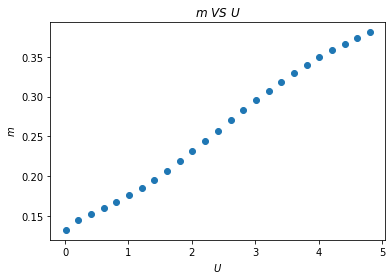

In [13]:
plt.scatter(U_lst,m_lst)
plt.title(r'$m\ VS\ U$')
plt.xlabel(r'$U$')
plt.ylabel(r'$m$')